<a href="https://colab.research.google.com/github/Dev-Atom42/MachineLearning-Calobaratory/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [42]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Посчитал столбцы по количеству пропусков. И столбец, который нужно обязательно исключить - MINIMUM_PAYMENTS, т.к. он имеет очень большое количество пропусков (313). Также, нужно удалить столбец CUST_ID, т.к. он содержит порядковый номер (ID), что для дальнейшей работы не понадобится. CREDIT_LIMIT содержит 1 пропуск, его думаю можно заменить медианным значением.

In [43]:
df = df.drop('CUST_ID', axis=1)
df = df.drop('MINIMUM_PAYMENTS', axis=1)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df #очищенная таблица

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6


In [44]:
df.isnull().sum() #повторная проверка

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Всё по нулям. Ну вот и хорошо.

In [45]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,1.000000,12.000000


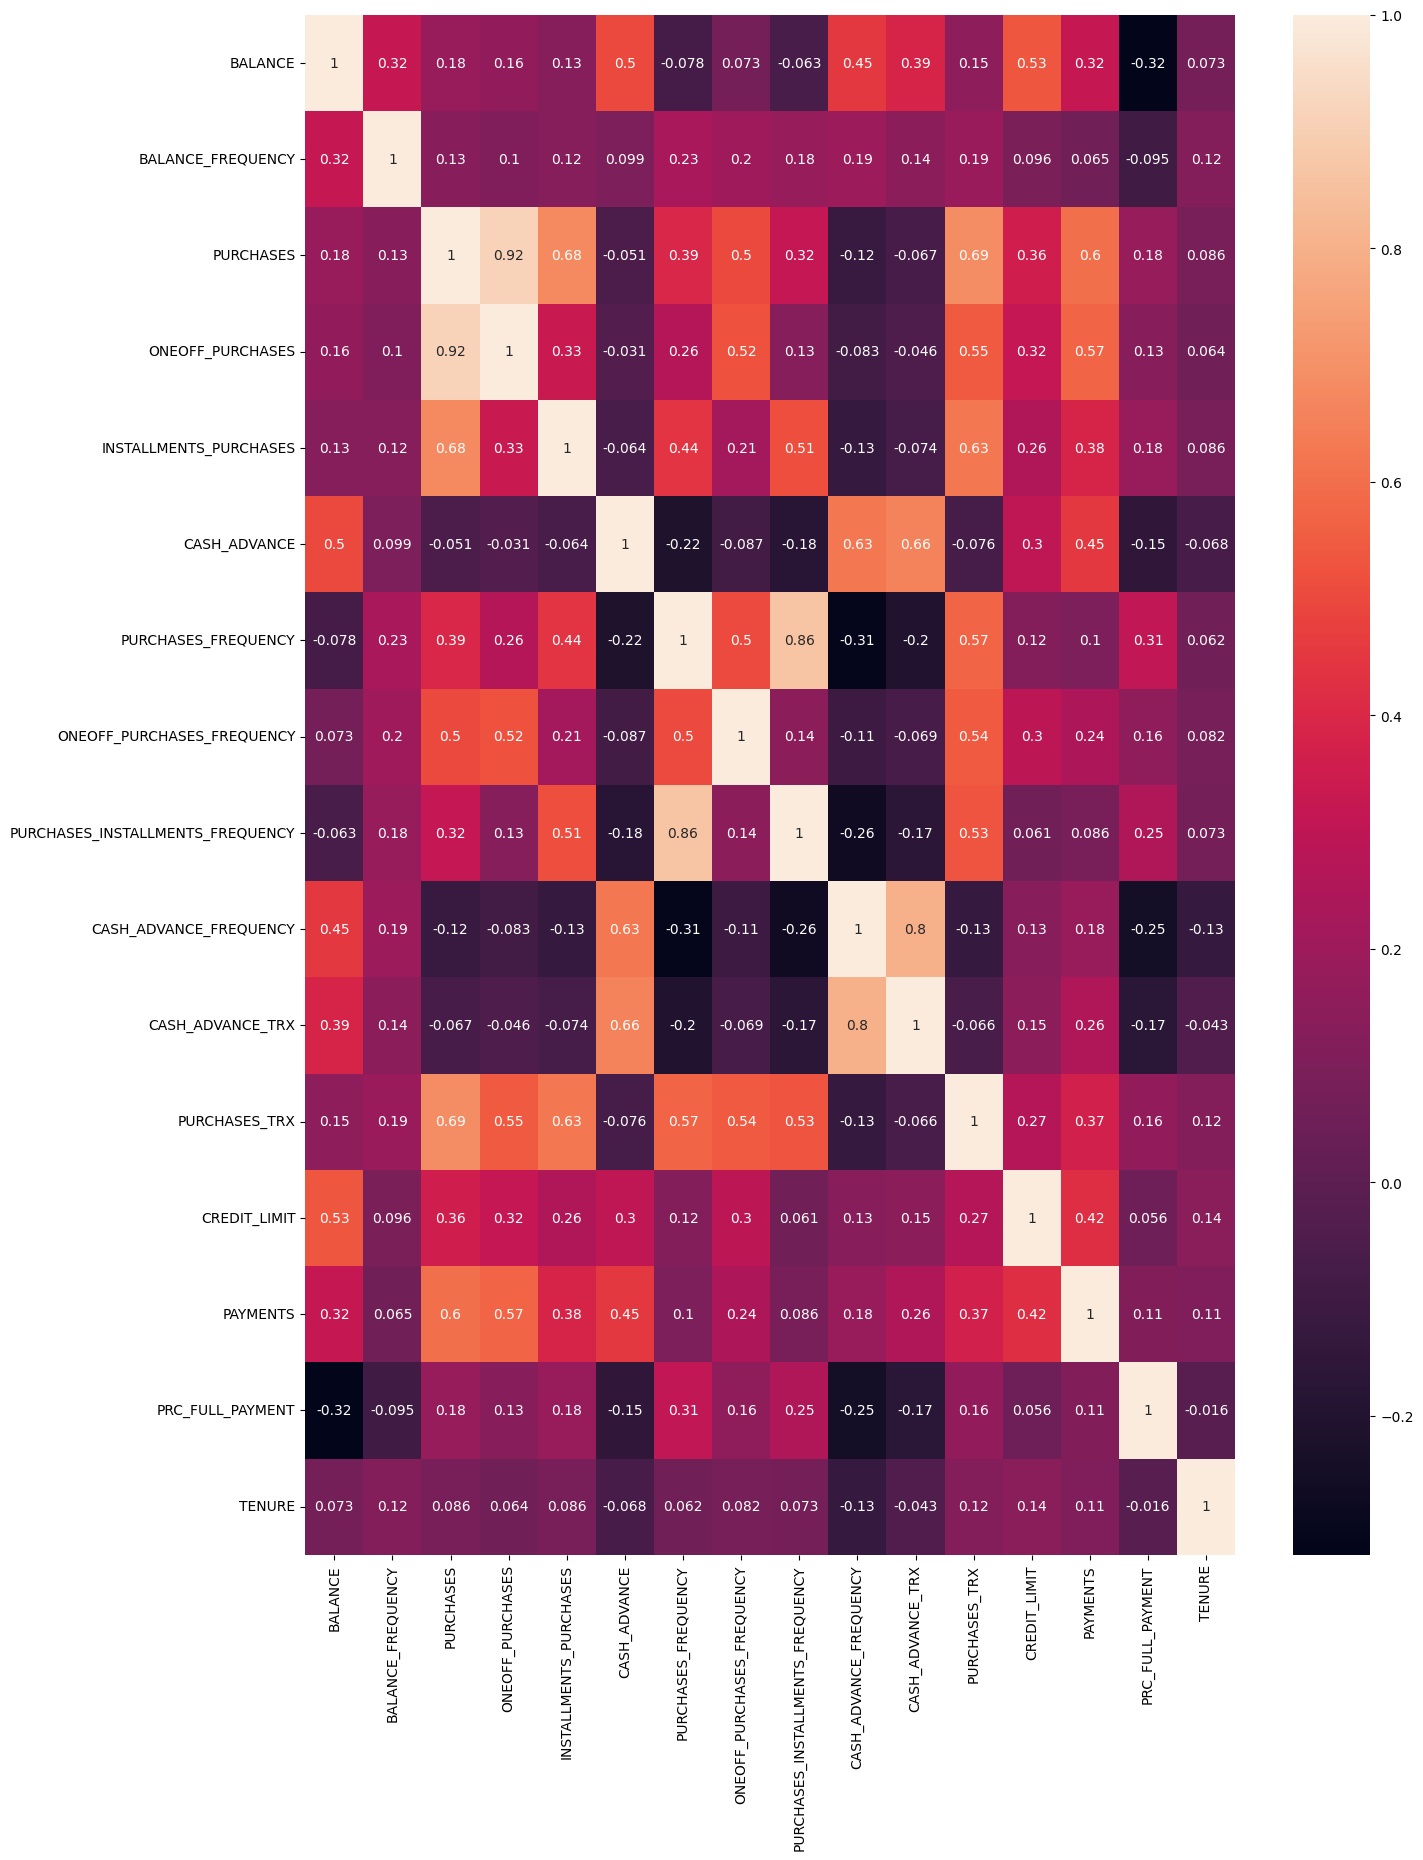

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
#Насколько элементы коррелируют + гистограмма, возможно понадобится
plt.figure(figsize=(15,20))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

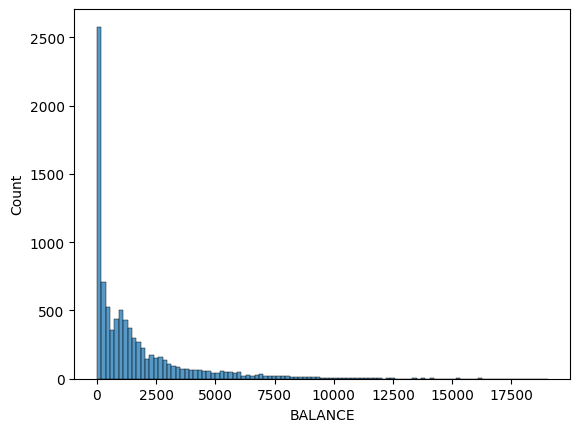

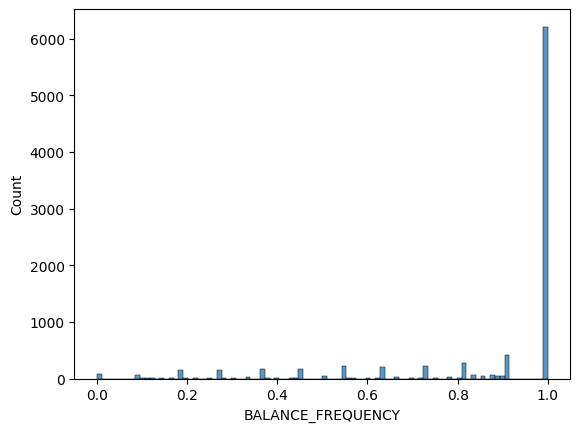

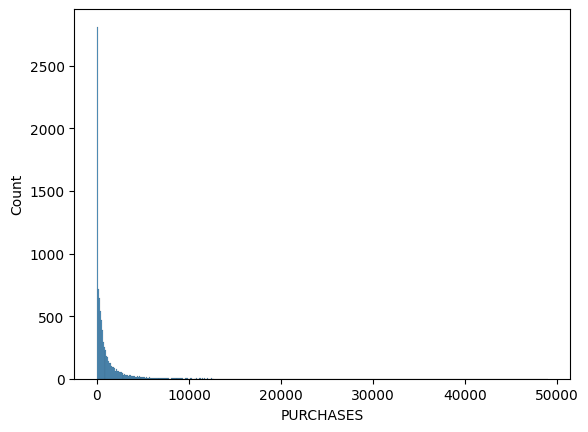

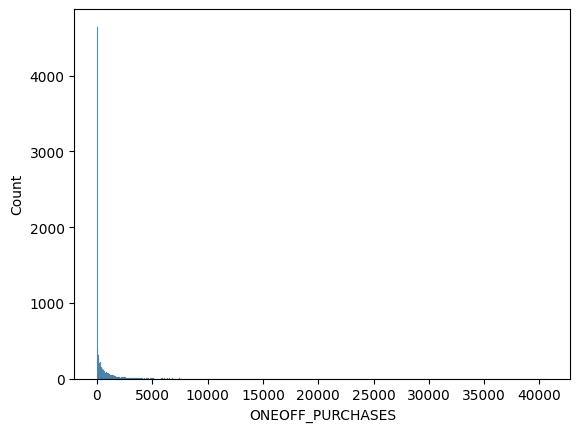

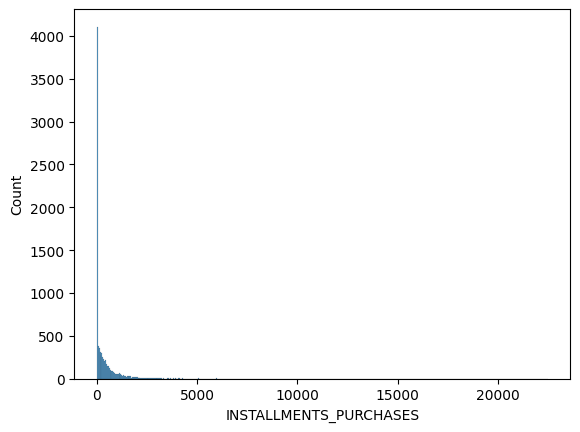

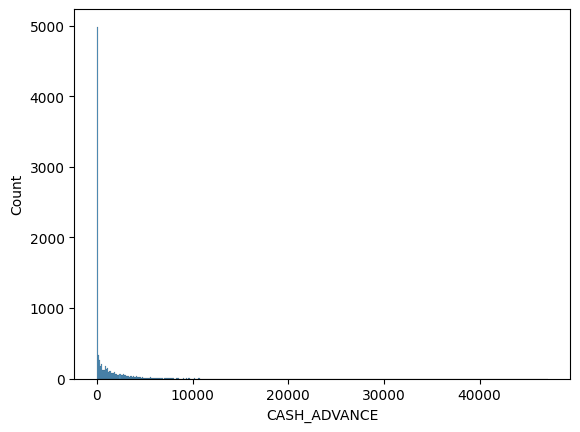

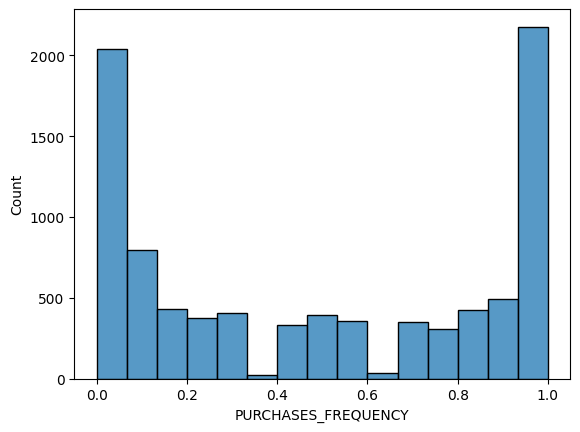

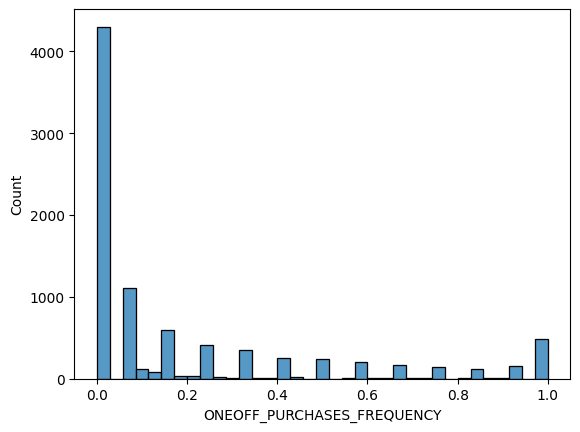

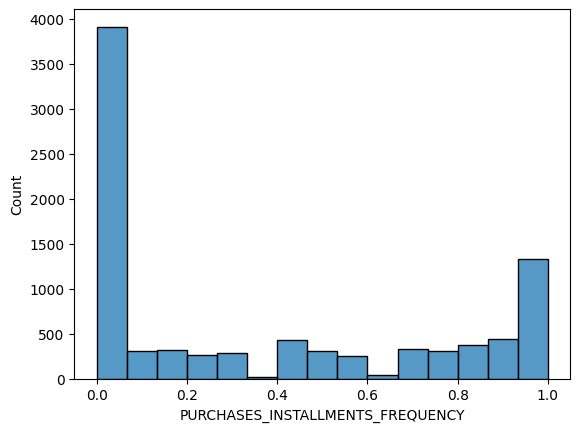

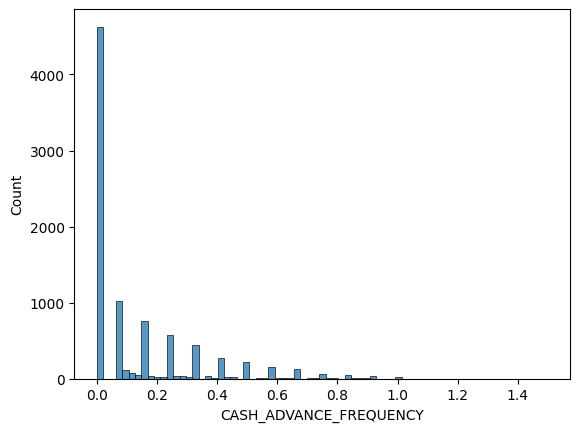

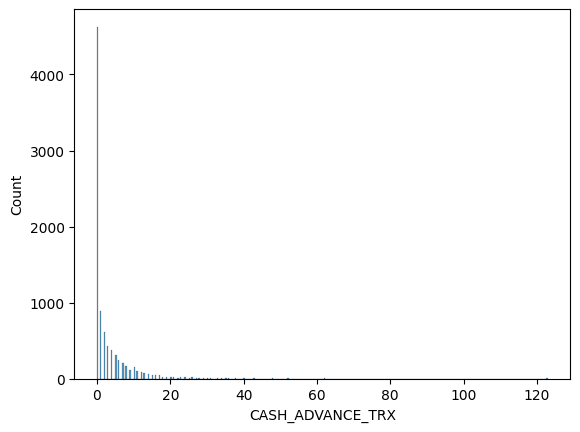

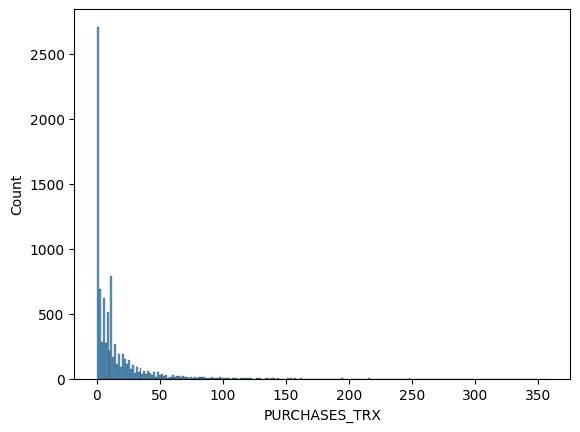

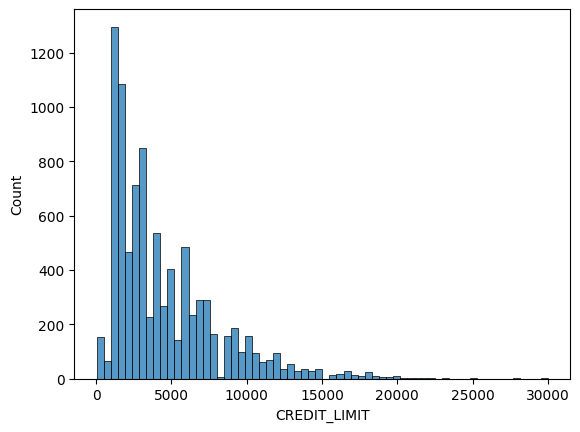

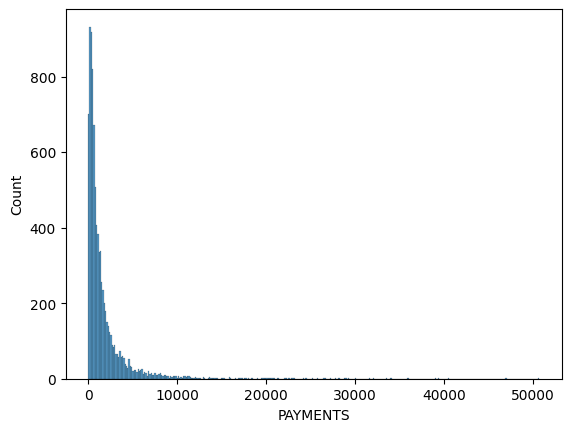

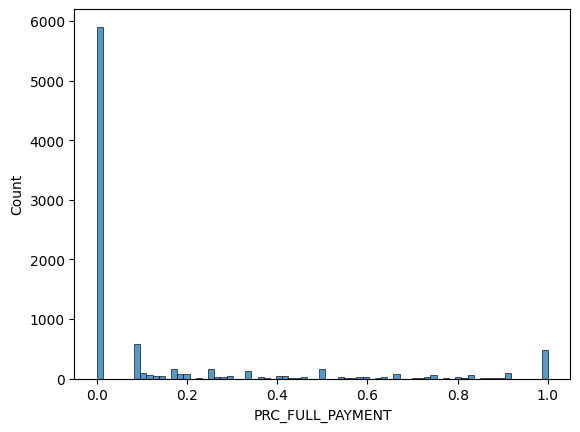

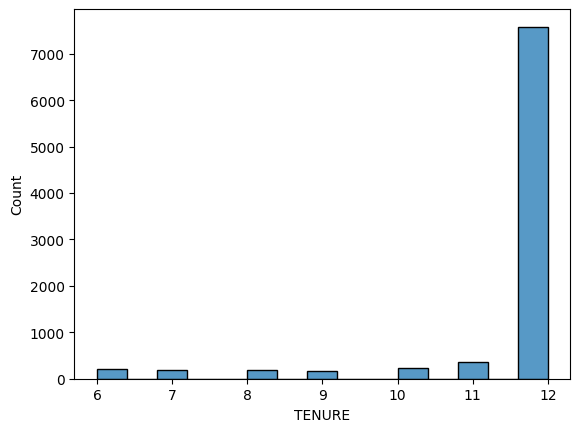

In [47]:
for column in df.columns:
    sns.histplot(df[column])
    plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
train_df, test_df = train_test_split(df)

#MinMax
mm = MinMaxScaler()
train_df = mm.fit_transform(train_df)
test_df = mm.transform(test_df)

pt = PowerTransformer()
train_df = pt.fit_transform(train_df)
test_df = pt.transform(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

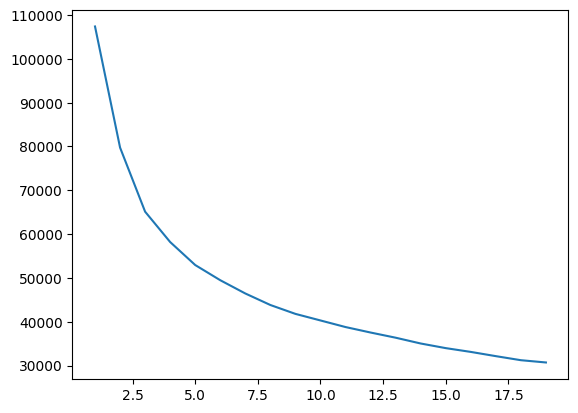

In [57]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""
from sklearn.cluster import KMeans
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++')
    km.fit(train_df)
    interclusterdistance.append(km.inertia_)

plt.plot(range(1, 20), interclusterdistance) #Пусть будет размерность до 20
plt.show()

При увеличинии X (Кол-во кластеров), уменьшается Y (расстояние между ними). До X = 5 причём даже очень.

In [58]:
km = KMeans(n_clusters = 5,init ='k-means++')
km.fit(train_df)
y_pred = km.predict(train_df) #предсказываем

cluster_df = pd.DataFrame(train_df,columns = df.columns)
cluster_df['clusters'] = y_pred
cluster_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,0.856943,0.630367,-0.345137,-0.521360,0.214726,1.663056,0.116766,-0.098041,0.457562,1.547798,1.973131,-0.156915,0.789081,-0.393697,-0.679078,0.424869,1
1,-0.798668,0.630367,1.731610,1.837428,1.607400,-0.756929,1.217989,1.669135,1.283995,-0.873840,-0.806833,1.813684,1.426996,1.055679,1.864096,0.424869,3
2,-1.184656,-1.841691,-0.724680,-0.778065,-0.217350,-0.756929,0.116766,-0.907754,0.640007,-0.873840,-0.806833,-0.273659,0.187055,-1.035395,1.864096,0.424869,0
3,-0.860586,0.630367,1.501927,1.395973,1.663871,-0.756929,1.217989,1.733342,1.376146,-0.873840,-0.806833,1.837514,1.112144,0.759960,1.678114,0.424869,3
4,-1.089749,-1.074858,-0.217100,0.397826,-0.874934,-0.756929,0.116766,1.387493,-1.006348,-0.873840,-0.806833,-0.156915,0.789081,-0.267249,1.127654,0.424869,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,1.098627,0.630367,-1.047534,-0.778065,-0.874934,-0.025825,-1.284453,-0.907754,-1.006348,0.750039,0.252004,-1.123711,0.517194,-0.220394,-0.679078,0.424869,4
6708,1.873704,0.630367,1.162836,1.672170,-0.148891,1.971016,1.217989,1.669135,1.376146,1.815860,2.007450,1.070669,1.601155,1.757643,-0.679078,0.424869,1
6709,0.692403,0.630367,-1.047534,-0.778065,-0.874934,0.593257,-1.284453,-0.907754,-1.006348,0.750039,0.252004,-1.123711,-0.450914,-0.756145,-0.679078,0.424869,4
6710,0.127979,-1.706732,-1.047534,-0.778065,-0.874934,1.400881,-1.284453,-0.907754,-1.006348,0.133394,-0.213663,-1.123711,-0.216136,-0.891298,-0.679078,0.424869,4


In [59]:
cluster_df['clusters'].value_counts()

4    1722
2    1540
0    1497
3    1190
1     763
Name: clusters, dtype: int64

Большинство элементов содержит 4-й кластер  
Затем по популярности 2
Потом 0  
Затем 3  
1-й содержит наименьшее количество элементов

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

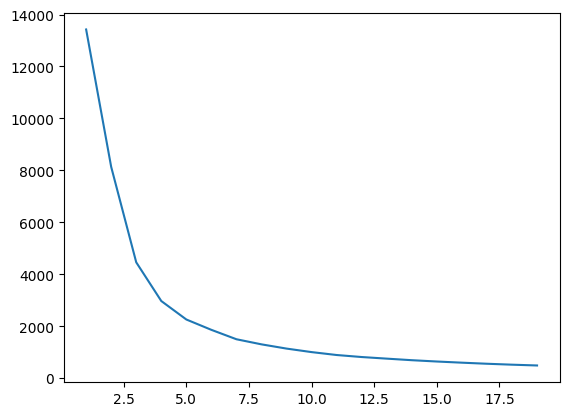

In [60]:
interclusterdistance = []
X = cluster_df[['BALANCE','PURCHASES']].to_numpy()

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++')
    km.fit(X)
    interclusterdistance.append(km.inertia_)

plt.plot(range(1, 20), interclusterdistance)
plt.show()

Отношение BALANCE к PURCHASE  
До X = 5 серьёзные изменения (так же как и с графиком выше, но тут эти изменения более наглядны)

In [61]:
km = KMeans(n_clusters = 5,init ='k-means++')
km.fit(X)
y_balance_pred = km.predict(X) #предсказываем

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

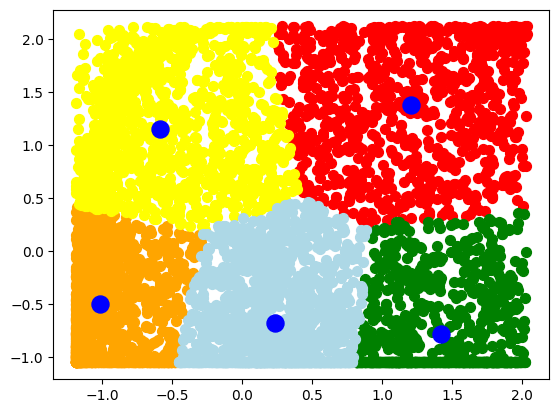

In [69]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=50, c='red', label ='1') #Каждый
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=50, c='orange', label ='2') #Охотник
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=50, c='yellow', label ='3') #Желает
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=50, c='green', label ='4') #Знать
plt.scatter(X[y_balance_pred==4, 0], X[y_balance_pred==4, 1], s=50, c='lightblue', label ='5') #Где

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=150, c='blue', label = 'Centralization') #Сидит эпицентр событий
plt.show() #Фазану места не хватило

In [70]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""
from sklearn.cluster import DBSCAN

In [71]:
dbscan = DBSCAN()
dbscan.fit(train_df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([-1, -1,  0, ..., 14, -1, 13])

In [72]:
dbscan_df = pd.DataFrame(train_df,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,0.856943,0.630367,-0.345137,-0.521360,0.214726,1.663056,0.116766,-0.098041,0.457562,1.547798,1.973131,-0.156915,0.789081,-0.393697,-0.679078,0.424869,-1
1,-0.798668,0.630367,1.731610,1.837428,1.607400,-0.756929,1.217989,1.669135,1.283995,-0.873840,-0.806833,1.813684,1.426996,1.055679,1.864096,0.424869,-1
2,-1.184656,-1.841691,-0.724680,-0.778065,-0.217350,-0.756929,0.116766,-0.907754,0.640007,-0.873840,-0.806833,-0.273659,0.187055,-1.035395,1.864096,0.424869,0
3,-0.860586,0.630367,1.501927,1.395973,1.663871,-0.756929,1.217989,1.733342,1.376146,-0.873840,-0.806833,1.837514,1.112144,0.759960,1.678114,0.424869,-1
4,-1.089749,-1.074858,-0.217100,0.397826,-0.874934,-0.756929,0.116766,1.387493,-1.006348,-0.873840,-0.806833,-0.156915,0.789081,-0.267249,1.127654,0.424869,-1
5,1.832799,0.630367,2.093620,2.137022,-0.874934,-0.756929,1.217989,1.733342,-1.006348,-0.873840,-0.806833,0.583539,1.775487,0.744111,-0.679078,0.424869,-1
6,-1.183008,-1.916768,-1.047534,-0.778065,-0.874934,-0.174055,-1.284453,-0.907754,-1.006348,0.133394,-0.213663,-1.123711,-1.126389,-0.834388,-0.679078,0.424869,-1
7,1.452507,0.630367,-1.047534,-0.778065,-0.874934,1.803360,-1.284453,-0.907754,-1.006348,1.385240,1.836629,-1.123711,0.789081,-0.180002,-0.679078,0.424869,1
8,-0.322686,0.630367,1.611556,1.980588,-0.173176,-0.756929,1.217989,1.733342,1.283995,-0.873840,-0.806833,1.611621,1.014215,0.917760,0.383028,0.424869,-1
9,-1.178954,-1.987936,-1.047534,-0.778065,-0.874934,-0.586408,-1.284453,-0.907754,-1.006348,0.133394,-0.213663,-1.123711,-1.324318,-1.316507,0.528808,0.424869,-1


In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here